In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input/geospatial-learn-course-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/geospatial-learn-course-data/CA_county_median_age.csv
/kaggle/input/geospatial-learn-course-data/top_universities.csv
/kaggle/input/geospatial-learn-course-data/japan-prefecture-population.csv
/kaggle/input/geospatial-learn-course-data/CA_county_population.csv
/kaggle/input/geospatial-learn-course-data/earthquakes1970-2014.csv
/kaggle/input/geospatial-learn-course-data/Philippines_AL258.kml
/kaggle/input/geospatial-learn-course-data/starbucks_locations.csv
/kaggle/input/geospatial-learn-course-data/purple_martin.csv
/kaggle/input/geospatial-learn-course-data/CA_county_high_earners.csv
/kaggle/input/geospatial-learn-course-data/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations.cpg
/kaggle/input/geospatial-learn-course-data/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations.shx
/kaggle/input/geospatial-learn-course-data/PhillyHealth_Air_Monitoring_Station

# Geospatial_data

In [2]:
import geopandas as gpd

Types of Geospatial file format - Shapefile, GeoJSON, KML an GPKG

In [3]:

full_data = gpd.read_file("../input/geospatial-learn-course-data/DEC_lands/DEC_lands/DEC_lands.shp")

full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


In [4]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

In [5]:
data = full_data.loc[:, ["CLASS","COUNTY","geometry"]].copy()

In [6]:
#data distrubution

data.CLASS.value_counts()

CLASS
WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: count, dtype: int64

In [7]:
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST','WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


<Axes: >

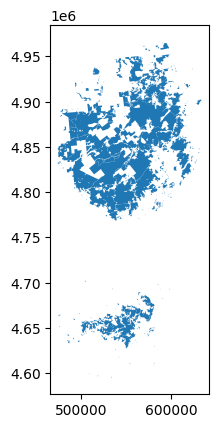

In [8]:
wild_lands.plot()

In [9]:
wild_lands.geometry.head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.550 4...
3    POLYGON ((541716.775 4675243.268, 541217.579 4...
4    POLYGON ((583896.043 4909643.187, 583891.200 4...
Name: geometry, dtype: geometry

Creating 3 GeoDataFrames containing Point, LineString and Polygon

In [10]:
# Campsites in New York state (Point)
POI_data = gpd.read_file("../input/geospatial-learn-course-data/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# Foot trails in New York state (LineString)
roads_trails = gpd.read_file("../input/geospatial-learn-course-data/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# County boundaries in New York state (Polygon)
counties = gpd.read_file("../input/geospatial-learn-course-data/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp")

In [11]:
POI_data.head()

,OBJECTID,UNIT,FACILITY,NAME,ASSET,DESCRIP,REGION,OFFICE,UPDATED,ASSET_UID,ACCESSIBLE,geometry
0,91706,CFP,DELAWARE WILD FOREST,ADA PRIMITIVE CAMPSITE,PRIMITIVE CAMPSITE,None,4,STAMFORD,2016-09-26,16519,N,POINT (505138.696 4649388.247)
1,108646,SCHUYLER 02,SUGAR HILL STATE FOREST,MAPLE LANE CAMPSITE #3,PRIMITIVE CAMPSITE,None,8,BATH,2018-02-23,18124,N,POINT (333481.874 4692737.800)
2,19933,AFP,MOOSE RIVER PLAINS WILD FOREST,MOOSE RIVER PLAINS CAMPSITE 103,PRIMITIVE CAMPSITE,LIVE,5,NORTHVILLE,2010-06-16,1018,N,POINT (525210.784 4833837.295)
3,3945,ALLEGANY 12,LOST NATION STATE FOREST,NEWLAND FR PARKING,UNPAVED PARKING LOT,-99,9,WEST ALMOND,None,8623,N,POINT (231909.125 4712818.500)
4,1037,CATTARAUGUS 08,ROCK CITY STATE FOREST,LRC PICNIC PAVILION #1,PICNIC PAVILION,None,9,ALLEGANY,None,14561,N,POINT (193656.734 4679632.500)


/usr/local/lib/python3.11/dist-packages/matplotlib/axes/_base.py:2917: RuntimeWarning: overflow encountered in scalar subtract
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


<Axes: >

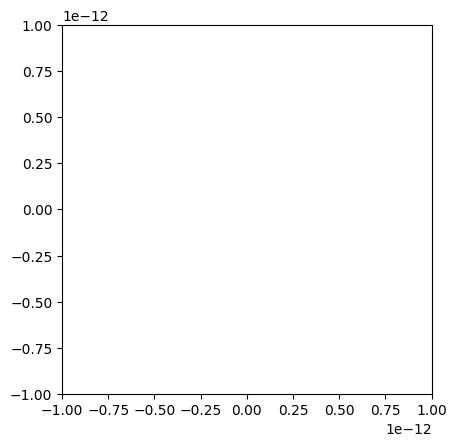

In [12]:
POI_data.plot()

In [13]:
roads_trails.head()

,OBJECTID,UNIT,FACILITY,NAME,ASSET,ATV,FOOT,HORSE,BIKE,XC,...,MAPPWD,DESCRIP,ROAD_CLASS,UPDATED,REGION,OFFICE,MARKER,TRANS_UID,SHAPE_LEN,geometry
0,208,AFP,FERRIS LAKE WILD FOREST,PHANTOM TRAIL,SNOWMOBILE TRAIL,N,Y,N,N,Y,...,N,None,RT,2011-05-17,5,NORTHVILLE,None,1583.181399,1577.112643,"LINESTRING (511367.312 4804744.000, 511442.406..."
1,211,AFP,FERRIS LAKE WILD FOREST,PHANTOM TRAIL,SNOWMOBILE TRAIL,N,Y,N,N,Y,...,N,None,RT,2011-05-17,5,NORTHVILLE,None,948.150638,945.366235,"LINESTRING (512806.962 4804560.806, 512796.625..."
2,212,AFP,FERRIS LAKE WILD FOREST,PARKER VLY TRAIL,SNOWMOBILE TRAIL,N,Y,N,N,Y,...,N,None,RT,2011-05-17,5,NORTHVILLE,None,3862.887604,3853.119292,"MULTILINESTRING ((515866.032 4804650.001, 5158..."
3,229,AFP,FERRIS LAKE WILD FOREST,WAGONERS LOOP,SNOWMOBILE TRAIL,N,Y,Y,Y,Y,...,N,None,RT,2011-05-17,5,NORTHVILLE,None,10536.778083,10485.458536,"LINESTRING (533975.501 4796126.500, 533992.812..."
4,233,AFP,FERRIS LAKE WILD FOREST,SHERIFF LAKE TRAIL,SNOWMOBILE TRAIL,N,Y,Y,Y,Y,...,N,None,RT,2011-05-17,5,NORTHVILLE,None,1439.438752,1432.490031,"LINESTRING (531496.700 4799892.919, 531482.375..."


<Axes: >

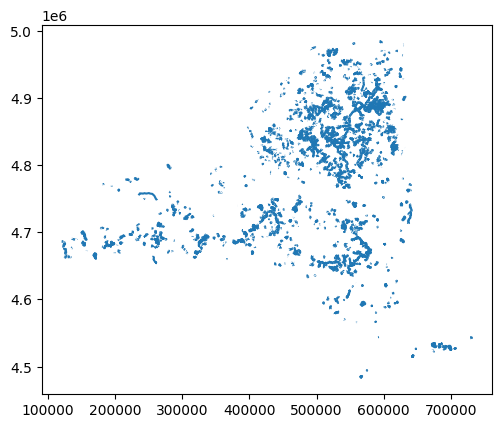

In [14]:
roads_trails.plot()

In [15]:
counties.head()

,STATE,COUNTY,NAME,LSAD,LSAD_TRANS,OID_,COUNTY_FIP,POP2000,WHITE,BLACK,...,FHH_MINORC,FAMILIES,AV_FAM_SZ,HSE_UNITS,URBAN,RURAL,VACANT,OWNER_OCC,RENTER_OCC,geometry
0,36,089,St. Lawrence,06,County,44,089,111931,105782,2664,...,2773,26939,3,49721,16085,33636,9215,28606,11900,"POLYGON ((522686.116 4977770.435, 522785.820 4..."
1,36,019,Clinton,06,County,9,019,79894,74562,2863,...,1951,19261,3,33091,12161,20930,3668,20157,9266,"POLYGON ((576869.554 4981194.984, 576661.323 4..."
2,36,033,Franklin,06,County,16,033,51134,42970,3389,...,1312,11805,3,23936,7409,16527,6005,12638,5293,"POLYGON ((576869.554 4981194.984, 577209.259 4..."
3,36,031,Essex,06,County,15,031,38851,36848,1092,...,810,9832,3,23115,4288,18827,8087,11089,3939,"POLYGON ((622025.362 4932488.545, 621958.049 4..."
4,36,045,Jefferson,06,County,22,045,111738,99118,6517,...,2815,28142,3,54070,20947,33123,14002,23906,16162,"POLYGON ((431513.316 4917024.860, 433126.724 4..."


<Axes: >

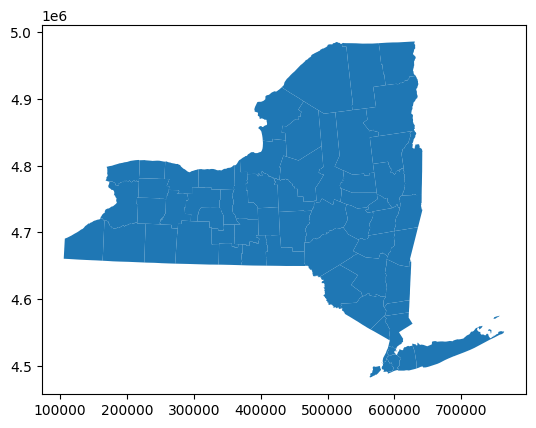

In [16]:
counties.plot()

<Axes: >

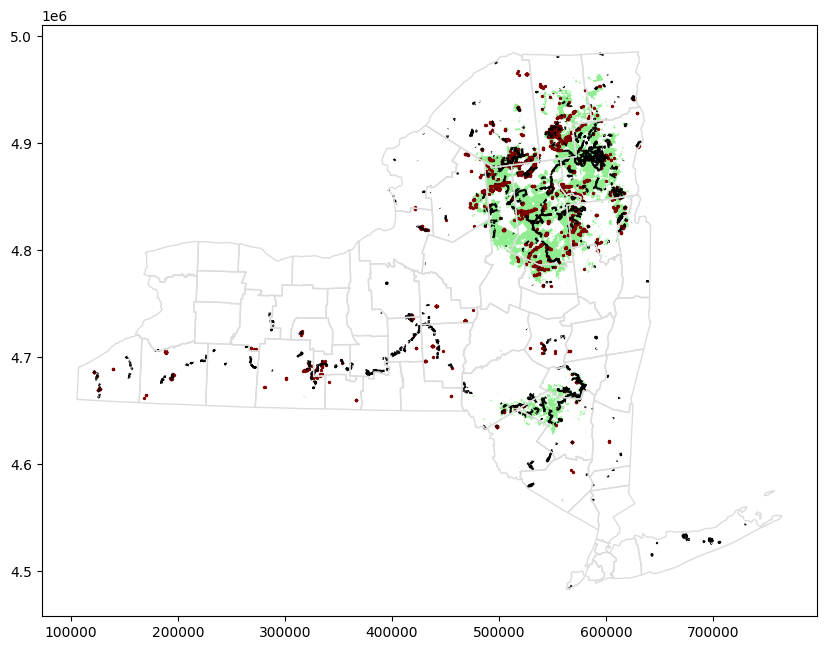

In [17]:
ax = counties.plot(figsize=(10,10),color ='none', edgecolor='gainsboro', zorder =3)

wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)